**TESLA STOCK PRICE PREDICTION**

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.express as px

In [2]:
#initialising plotly
import plotly.io as pio
pio.renderers.default = 'colab'

**IMPORTING THE DATASET**

In [3]:
df= pd.read_csv('tesla1 .csv')

In [4]:
df

,Date,Close/Last,Volume,Open,High,Low
0,01/16/2025,$413.82,68335150,$423.49,$424.00,$409.13
1,01/15/2025,$428.22,81375460,$409.90,$429.80,$405.661
2,01/14/2025,$396.36,84565020,$414.34,$422.64,$394.54
3,01/13/2025,$403.31,67580490,$383.21,$403.79,$380.07
4,01/10/2025,$394.74,62287330,$391.40,$399.28,$377.29
...,...,...,...,...,...,...
247,01/23/2024,$209.14,106605900,$211.30,$215.65,$207.7516
248,01/22/2024,$208.80,117952500,$212.26,$217.80,$206.27
249,01/19/2024,$212.19,102260300,$209.99,$213.19,$207.56
250,01/18/2024,$211.88,108595400,$216.88,$217.45,$208.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        252 non-null    object
 1   Close/Last  252 non-null    object
 2   Volume      252 non-null    int64 
 3   Open        252 non-null    object
 4   High        252 non-null    object
 5   Low         252 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.9+ KB


In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove the '$' sign and convert numeric columns to float
numeric_columns = ['Close/Last', 'Open', 'High', 'Low']
for col in numeric_columns:
    df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        252 non-null    datetime64[ns]
 1   Close/Last  252 non-null    float64       
 2   Volume      252 non-null    int64         
 3   Open        252 non-null    float64       
 4   High        252 non-null    float64       
 5   Low         252 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [10]:
df.describe() #for statistical information

,Date,Close/Last,Volume,Open,High,Low
count,252,252.000000,2.520000e+02,252.000000,252.000000,252.000000
mean,2024-07-16 09:31:25.714285824,237.316786,9.392431e+07,237.205996,242.540026,231.808825
min,2024-01-17 00:00:00,142.050000,3.716762e+07,140.560000,144.440000,138.802500
25%,2024-04-16 18:00:00,180.005000,7.022400e+07,181.950000,184.505000,176.980000
50%,2024-07-17 12:00:00,210.695000,8.572580e+07,212.070000,216.005000,207.655800
75%,2024-10-15 06:00:00,252.715000,1.097296e+08,252.947500,258.824750,246.772500
max,2025-01-16 00:00:00,479.860000,2.438697e+08,475.900000,488.539900,457.510100
std,NaN,78.593132,3.342619e+07,78.584780,81.015563,75.611032


**VISUALISATION OF HISTORICAL DATA OF TESLA STOCKS**

In [11]:
px.area(df,x="Date",y="Close/Last",title="TESLA STOCK PRICE")

In [12]:
px.line(df,x="Date", y="Volume")

In [13]:
px.box(df,y="Close/Last")

**DATA PREPARATION**

In [14]:
df

,Date,Close/Last,Volume,Open,High,Low
0,2025-01-16,413.82,68335150,423.49,424.00,409.1300
1,2025-01-15,428.22,81375460,409.90,429.80,405.6610
2,2025-01-14,396.36,84565020,414.34,422.64,394.5400
3,2025-01-13,403.31,67580490,383.21,403.79,380.0700
4,2025-01-10,394.74,62287330,391.40,399.28,377.2900
...,...,...,...,...,...,...
247,2024-01-23,209.14,106605900,211.30,215.65,207.7516
248,2024-01-22,208.80,117952500,212.26,217.80,206.2700
249,2024-01-19,212.19,102260300,209.99,213.19,207.5600
250,2024-01-18,211.88,108595400,216.88,217.45,208.7400


In [15]:
columns=['Date','Close/Last']
ndf=pd.DataFrame(df,columns=columns)

In [16]:
ndf

,Date,Close/Last
0,2025-01-16,413.82
1,2025-01-15,428.22
2,2025-01-14,396.36
3,2025-01-13,403.31
4,2025-01-10,394.74
...,...,...
247,2024-01-23,209.14
248,2024-01-22,208.80
249,2024-01-19,212.19
250,2024-01-18,211.88


In [17]:
prophet_df=ndf.rename(columns={'Date':'ds','Close/Last':'y'})

In [18]:
prophet_df

,ds,y
0,2025-01-16,413.82
1,2025-01-15,428.22
2,2025-01-14,396.36
3,2025-01-13,403.31
4,2025-01-10,394.74
...,...,...
247,2024-01-23,209.14
248,2024-01-22,208.80
249,2024-01-19,212.19
250,2024-01-18,211.88


**CREATING FACEBOOK PROPHET MODEL**

In [19]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7qut2u/m_51rx4z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d7qut2u/blfdxkb3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22514', 'data', 'file=/tmp/tmp5d7qut2u/m_51rx4z.json', 'init=/tmp/tmp5d7qut2u/blfdxkb3.json', 'output', 'file=/tmp/tmp5d7qut2u/prophet_model3fjpqdkc/prophet_model-20250117114944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Forecasting**

In [31]:
future= m.make_future_dataframe(periods=120)
forecast=m.predict(future)

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-17,198.080450,162.733313,225.262954,198.080450,198.080450,-3.554932,-3.554932,-3.554932,-3.554932,-3.554932,-3.554932,0.0,0.0,0.0,194.525518
1,2024-01-18,197.820644,164.045144,222.098613,197.820644,197.820644,-4.361059,-4.361059,-4.361059,-4.361059,-4.361059,-4.361059,0.0,0.0,0.0,193.459585
2,2024-01-19,197.560839,165.690126,223.961264,197.560839,197.560839,-3.239910,-3.239910,-3.239910,-3.239910,-3.239910,-3.239910,0.0,0.0,0.0,194.320929
3,2024-01-22,196.781423,164.875521,223.804333,196.781423,196.781423,-2.792630,-2.792630,-2.792630,-2.792630,-2.792630,-2.792630,0.0,0.0,0.0,193.988792
4,2024-01-23,196.521617,164.963634,222.323770,196.521617,196.521617,-3.194237,-3.194237,-3.194237,-3.194237,-3.194237,-3.194237,0.0,0.0,0.0,193.327380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2025-05-12,710.292731,664.270494,749.439977,681.297086,740.767248,-2.792630,-2.792630,-2.792630,-2.792630,-2.792630,-2.792630,0.0,0.0,0.0,707.500101
368,2025-05-13,712.484201,666.981336,752.259077,683.171835,743.318421,-3.194237,-3.194237,-3.194237,-3.194237,-3.194237,-3.194237,0.0,0.0,0.0,709.289964
369,2025-05-14,714.675671,669.707361,754.748000,685.160853,746.052574,-3.554932,-3.554932,-3.554932,-3.554932,-3.554932,-3.554932,0.0,0.0,0.0,711.120739
370,2025-05-15,716.867141,669.507640,755.876799,687.149871,748.835636,-4.361059,-4.361059,-4.361059,-4.361059,-4.361059,-4.361059,0.0,0.0,0.0,712.506083


In [33]:
px.line(forecast,x='ds',y='yhat')

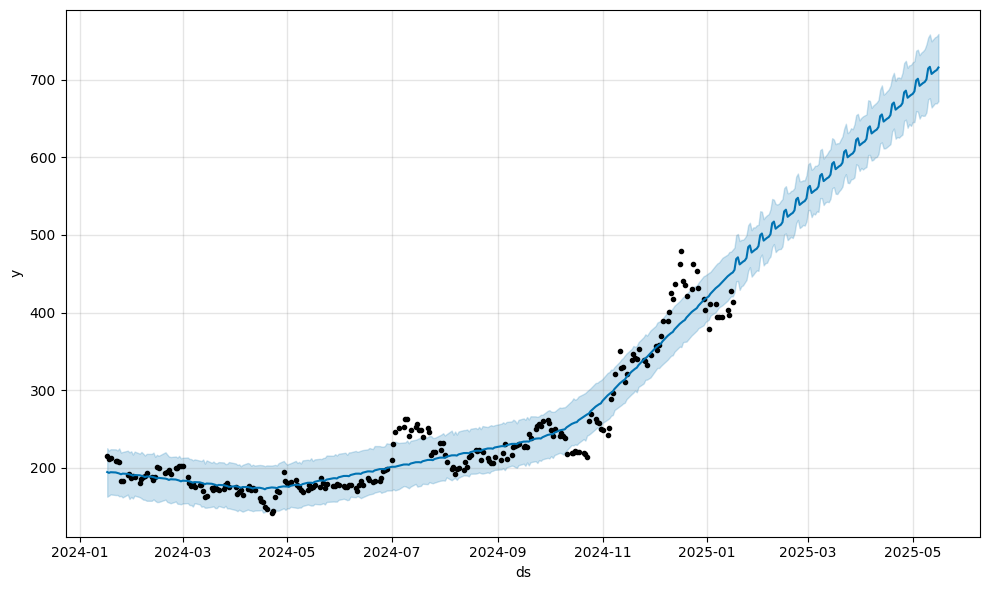

In [34]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

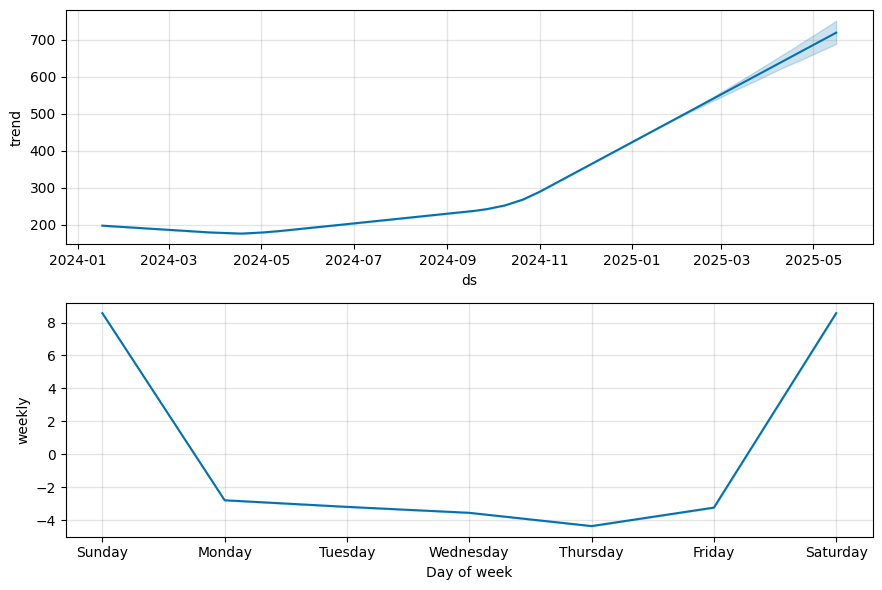

In [35]:
#visualising trends
figure2=m.plot_components(forecast)